## Código para poder usar la GPU
Si no la tienes deberia uncionar sin problema igual

In [1]:
import tensorflow as tf
import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

2023-03-03 16:19:44.743352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 16:19:44.799664: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-03 16:19:45.077937: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/victorxesus.barreiro/anaconda3/envs/deepgpu4/lib/
2023-03-03 16:19:45.077968: W tensorflow/

In [2]:
import tensorflow as tf

# Obtener la lista de dispositivos físicos disponibles
devices = tf.config.list_physical_devices('GPU')

if len(devices) > 0:
  # Configurar TensorFlow para usar la primera GPU disponible
  tf.config.set_visible_devices(devices[0], 'GPU')
  print('Se utilizará la GPU:', devices[0])
else:
  print('No se encontraron dispositivos GPU disponibles.')

Se utilizará la GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2023-03-03 16:19:45.330721: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 16:19:45.333366: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 16:19:45.333430: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
import tensorflow as tf

print("Dispositivo actual: ", tf.test.gpu_device_name())

2023-03-03 16:19:45.352215: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 16:19:45.353076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 16:19:45.353226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 16:19:45.353307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

Dispositivo actual:  /device:GPU:0


# Cargamos los datos

In [4]:
# Dataset path
from os import listdir
import os.path

PATH = './faces_dataset_train/'
PATH_TEST = './faces_dataset_test/'

assert os.path.exists(PATH), 'Verify the above commands'
assert os.path.exists(PATH_TEST), 'Verify the above commands'

### Metadata access

In [5]:
import json

with open(PATH + 'metadata.json') as fIn:
    metadata = json.loads(fIn.read())
with open(PATH_TEST + 'metadata.json') as fIn:
    metadata_test = json.loads(fIn.read())

metadata_example_key = next(iter(metadata.keys()))
metadata_example_value = metadata[metadata_example_key]

print(metadata_example_key, end=' ----> ')
print(metadata_example_value)

i07/nm0322407_rm852269056_1955-3-29_2005.jpg ----> {'age': 50, 'gender': 'M'}


### Image reading

In [6]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

2023-03-03 16:19:45.944681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 16:19:45.944764: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 16:19:45.944805: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 16:19:45.944872: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 16:19:45.944913: I tensorflow/compiler/xla/stream_executo

<TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
Image shape:  (32, 32, 3)
Label:  1


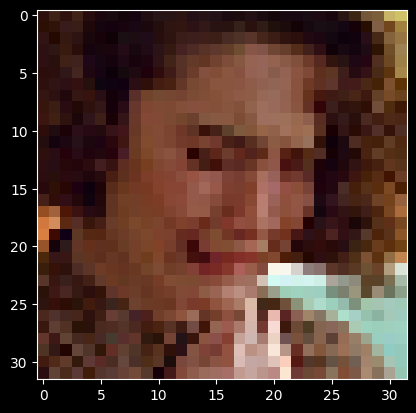

Image shape:  (32, 32, 3)
Label:  0


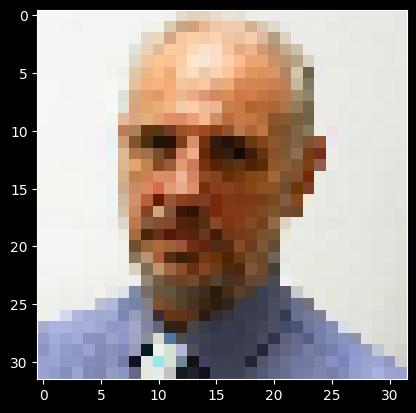

Image shape:  (32, 32, 3)
Label:  0


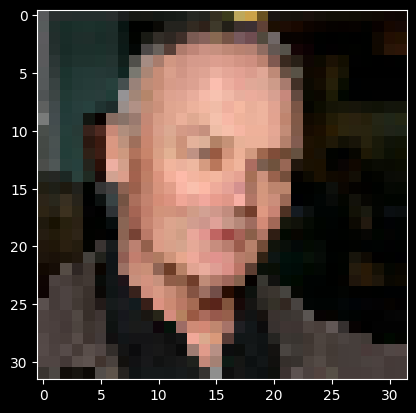

Image shape:  (32, 32, 3)
Label:  0


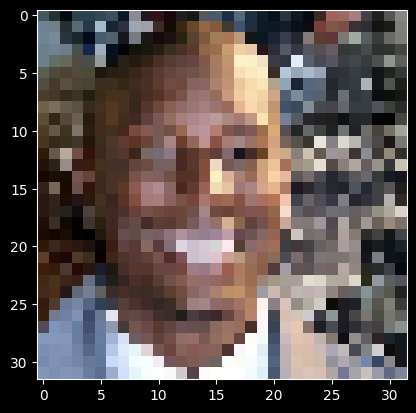

Image shape:  (32, 32, 3)
Label:  1


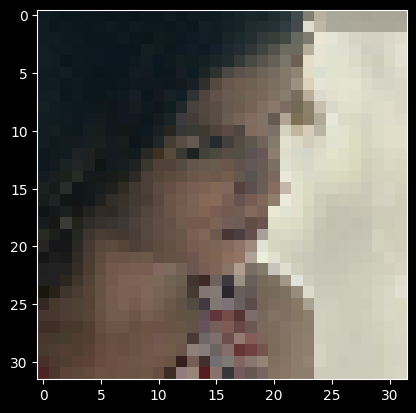

In [7]:
import tensorflow as tf
from matplotlib import pyplot

# Size at which images will be processed
img_height = 32
img_width = 32

def decode_img(img):
    '''Transforms a string that represents the path of an image into a matrix
    (img_height, img_width, 3) of uint8 representing the pixel values
    '''
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_jpeg(img, channels=3)
    # Resize the image to the desired size.
    return tf.cast(tf.image.resize(img, [img_height, img_width]),tf.uint8)

# def process_path_age(file_path):
#     '''Transforma cadenas de la forma 'ruta|edad|genero' a tuplas (imagen, etiqueta)
#     '''
#     parts = tf.strings.split(file_path, '|')
#     age = parts[1]
#     age = tf.strings.to_number(age, out_type=tf.dtypes.int32)
#     gender = parts[2]
#     # Load the raw data from the file as a string
#     img = tf.io.read_file(parts[0])
#     img = decode_img(img)
#     return img, age

def process_path(file_path):
    '''Transforms strings of the form 'path|age|gender' to tuples (image, label)
    '''
    parts = tf.strings.split(file_path, '|')
    print(parts)
    gender = tf.cast(0 if parts[2] == 'M' else 1, tf.dtypes.int32)
    # Load the raw data from the file as a string
    img = tf.io.read_file(parts[0])
    img = decode_img(img)
    return img, gender

def format_metadata(m, path):
    '''Transforms the metadata dictionary m into a list of strings of the form 'path to the image|age|gender'.
    '''
    return list(map(lambda x: '{0}{1}|{2}|{3}'.format(path,x,m[x]['age'],m[x]['gender']),m.keys()))

# We build a dataset of text strings from the metadata
train_metadata = format_metadata(metadata, PATH)
train_ds = tf.data.Dataset.from_tensor_slices(train_metadata)
print(train_ds.take(1))

# Mapping to an image dataset with tags
train_ds = train_ds.shuffle(len(train_ds)).map(process_path)

# Same process for test
test_ds = tf.data.Dataset.from_tensor_slices(format_metadata(metadata_test, PATH_TEST))
test_ds = test_ds.map(process_path)

# Checking
for image, label in train_ds.take(5):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())
    pyplot.imshow(image.numpy())
    pyplot.show()

In [8]:
ds_train_transform = train_ds
ds_test_transform = test_ds
print(train_metadata[0])

./faces_dataset_train/i07/nm0322407_rm852269056_1955-3-29_2005.jpg|50|M


In [9]:
# OPTIONAL: rescaling input to [-1, 1]
ds_train_transform = ds_train_transform.map(lambda image, label: (tf.cast(image, tf.float32)/127.5 - 1., label))
ds_test_transform = ds_test_transform.map(lambda image, label: (tf.cast(image, tf.float32)/127.5 - 1., label))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
# OPTIONAL: sample gender weights
import numpy as np
labels = [0 if x.split('|')[2] == 'M' else 1 for x in train_metadata]
freqs = np.array([1. - np.mean(labels), np.mean(labels)])
i_freqs = 1. / freqs
sample_weights = tf.convert_to_tensor(len(i_freqs) * i_freqs / i_freqs.sum())
print(sample_weights)
ds_train_transform = ds_train_transform.map(lambda image, label: (image, label, sample_weights[label]))
ds_test_transform = ds_test_transform.map(lambda image, label: (image, label, sample_weights[label]))

tf.Tensor([0.8294171 1.1705829], shape=(2,), dtype=float64)


In [11]:
batch_size = 128
ds_train_batch = ds_train_transform.batch(batch_size)
ds_test_batch = ds_test_transform.batch(batch_size)

# Funciones auxiliares

In [12]:
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import Input, Model
from keras.utils import plot_model

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np

def visualize_fit(history):
    """Procedure to print de evolution of a training process.

    Args:
        history (dict): _description_
    """    
    history_dict = history.history
    history_dict.keys()

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'b-o', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    plt.plot(epochs, acc, 'b-o', label='Training acc')
    plt.plot(epochs, val_acc, 'r-o', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def fitModel(model, ds_train, ds_val, num_epochs=20, monitor='val_loss'):
    checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor=monitor, mode='auto', verbose=0)
    history = model.fit(ds_train, verbose = 1, epochs=num_epochs, callbacks=[checkpoint], validation_data=ds_val)
    result = model.evaluate(ds_val)
    print(result)
    visualize_fit(history)
    return result

# Modelos

## Primera propuesta

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 30, 30, 8)         216       
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 8)         576       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 8)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_34 (Conv2D)          (None, 12, 12, 16)        1152      
                                                                 
 batch_normalization_29 (Bat  (None, 12, 12, 16)       64        
 chNormalization)                                         

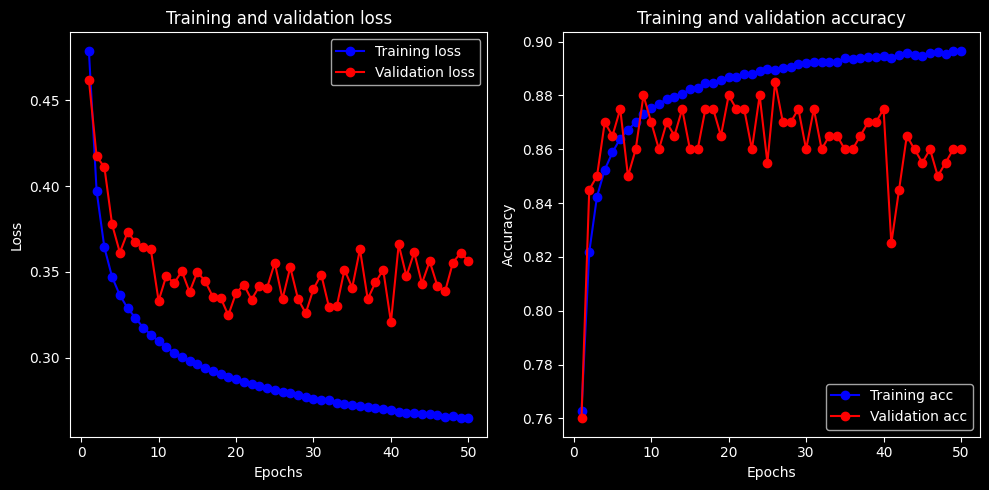

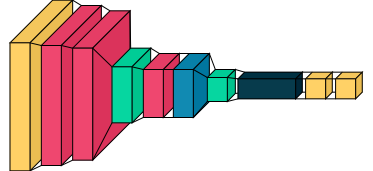

In [24]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)

x = Dense(8, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=50)

import visualkeras
visualkeras.layered_view(model)

Bajamos el learning rate de cara a evitar que oscile y poder avanzar más despacio hacia el final aunque necesitemos más épocas

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 30, 30, 8)         216       
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 8)         576       
                                                                 
 average_pooling2d_10 (Avera  (None, 14, 14, 8)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_37 (Conv2D)          (None, 12, 12, 16)        1152      
                                                                 
 batch_normalization_30 (Bat  (None, 12, 12, 16)       64        
 chNormalization)                                         

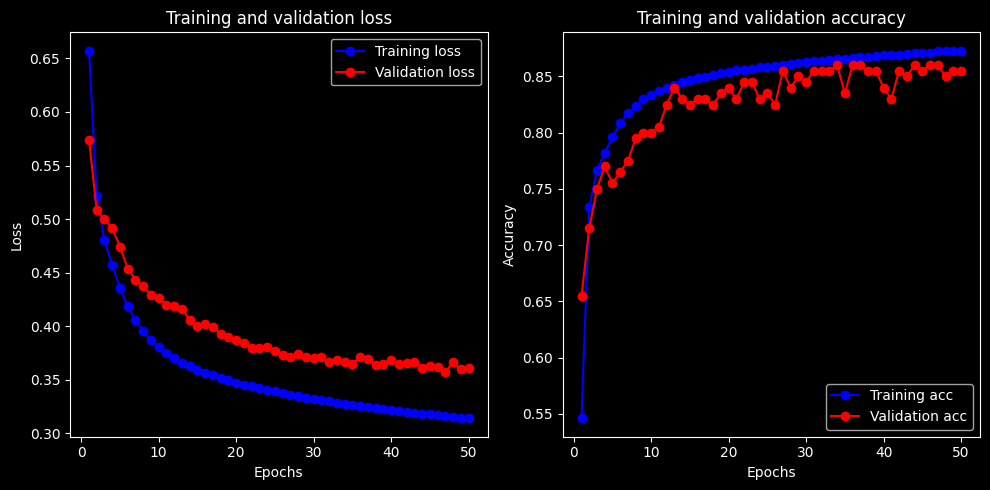

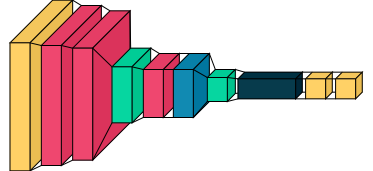

In [25]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)

x = Dense(8, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=50)

import visualkeras
visualkeras.layered_view(model)

Parece que hace overfitting prque sem mantiene durante muchas épocas el conjunto de inin por debajo del de validación aunque ro si esto es discutible porque la distancia es muy pequeña.

Añadimos una capa de normalización más con la idea de que nos sirva para regularizar.

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 30, 30, 8)         216       
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 8)         576       
                                                                 
 average_pooling2d_13 (Avera  (None, 14, 14, 8)        0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_32 (Bat  (None, 14, 14, 8)        32        
 chNormalization)                                                
                                                                 
 conv2d_42 (Conv2D)          (None, 12, 12, 16)        115

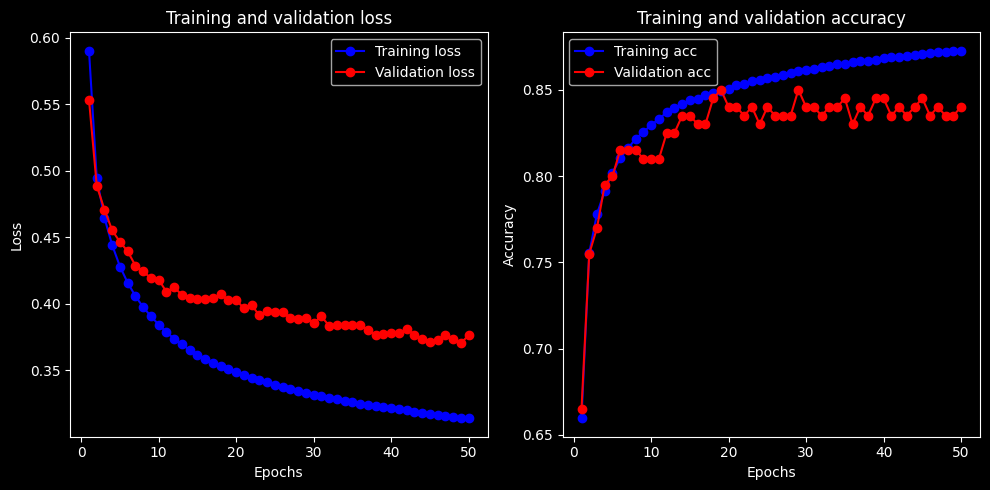

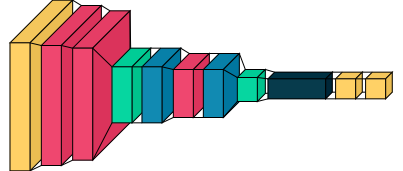

In [27]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)

x = Dense(8, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=50)

import visualkeras
visualkeras.layered_view(model)

Vamos a añadir mas regularización e intentar añadir mas compleijad a la red para que se acerque al overfitting.

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 30, 30, 16)        432       
                                                                 
 conv2d_44 (Conv2D)          (None, 28, 28, 16)        2304      
                                                                 
 average_pooling2d_15 (Avera  (None, 14, 14, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_34 (Bat  (None, 14, 14, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 12, 12, 32)        460

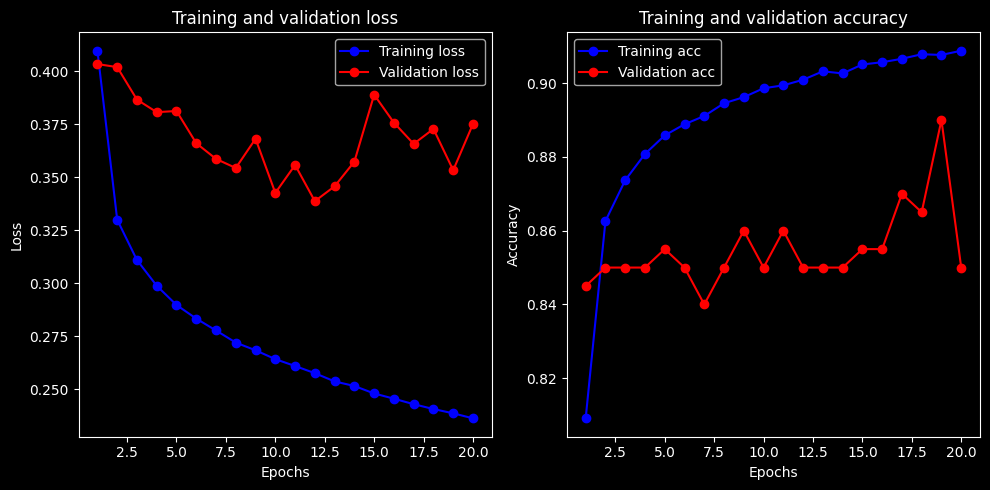

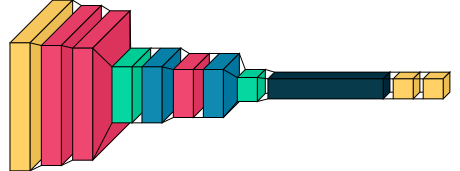

In [28]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)

x = Dense(8, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Vamos a añadir más complejidad a la capa densa.

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 30, 30, 16)        432       
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 16)        2304      
                                                                 
 average_pooling2d_17 (Avera  (None, 14, 14, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_36 (Bat  (None, 14, 14, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_48 (Conv2D)          (None, 12, 12, 32)        460

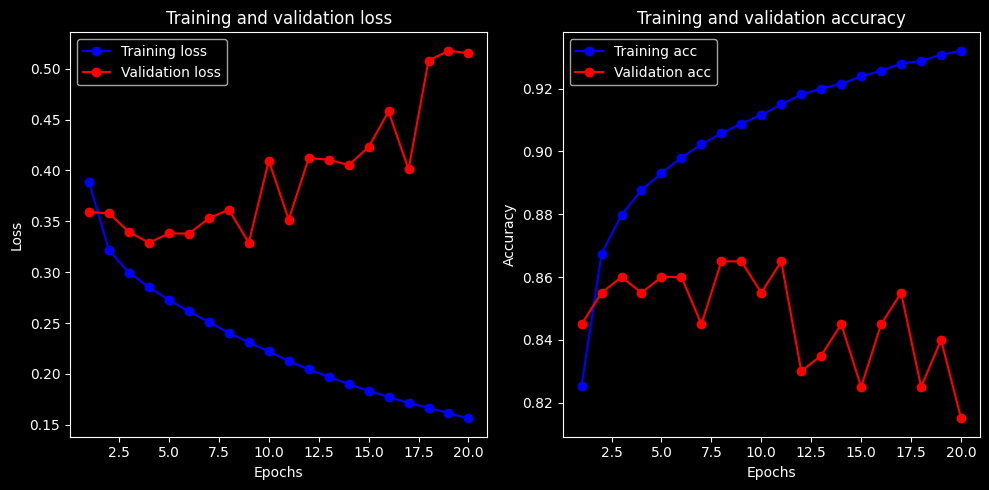

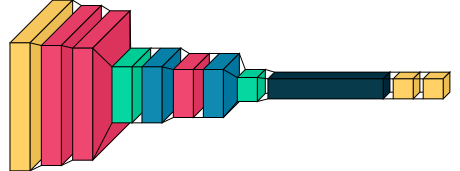

In [29]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)

x = Dense(64, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 30, 30, 32)        864       
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 64)        18432     
                                                                 
 batch_normalization_40 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_54 (Conv2D)          (None, 26, 26, 128)       73728     
                                                                 
 batch_normalization_41 (Bat  (None, 26, 26, 128)      512       
 chNormalization)                                         

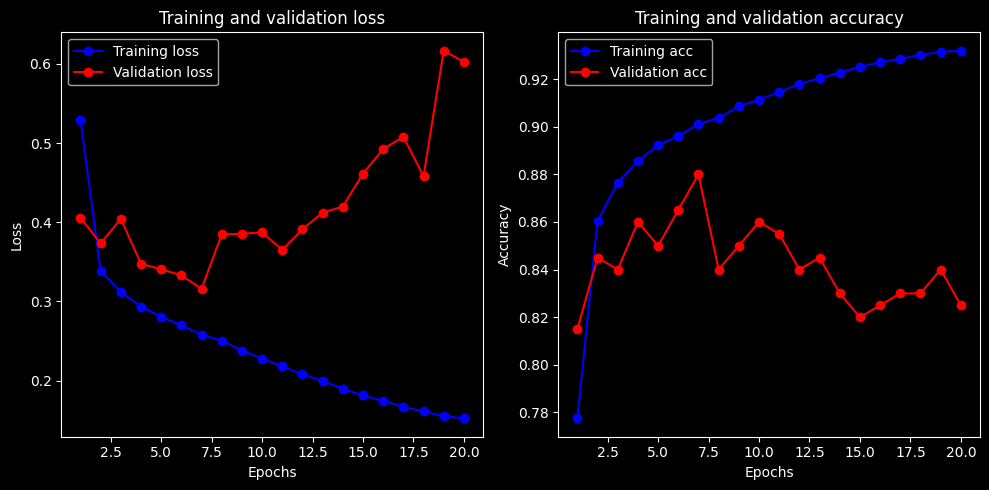

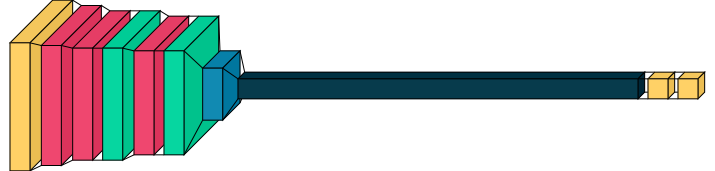

In [31]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)

x = Dense(64, activation='relu', use_bias=False)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Añadimos normalización de cara a evitar el overfitting

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_55 (Conv2D)          (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_42 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_56 (Conv2D)          (None, 28, 28, 64)        18432     
                                                                 
 batch_normalization_43 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 26, 26, 128)       737

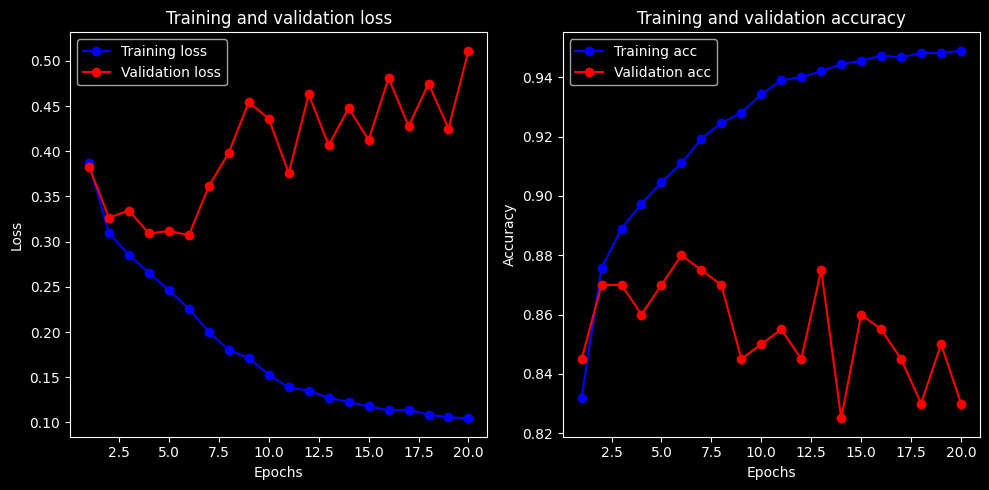

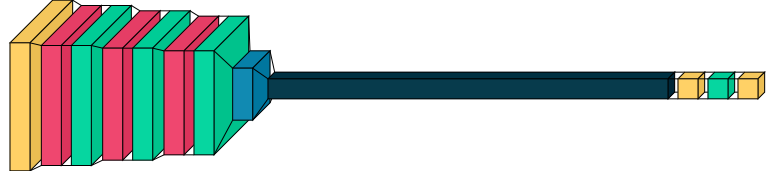

In [32]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)

x = Dense(64, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_46 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_59 (Conv2D)          (None, 28, 28, 64)        18432     
                                                                 
 batch_normalization_47 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_60 (Conv2D)          (None, 26, 26, 128)       737

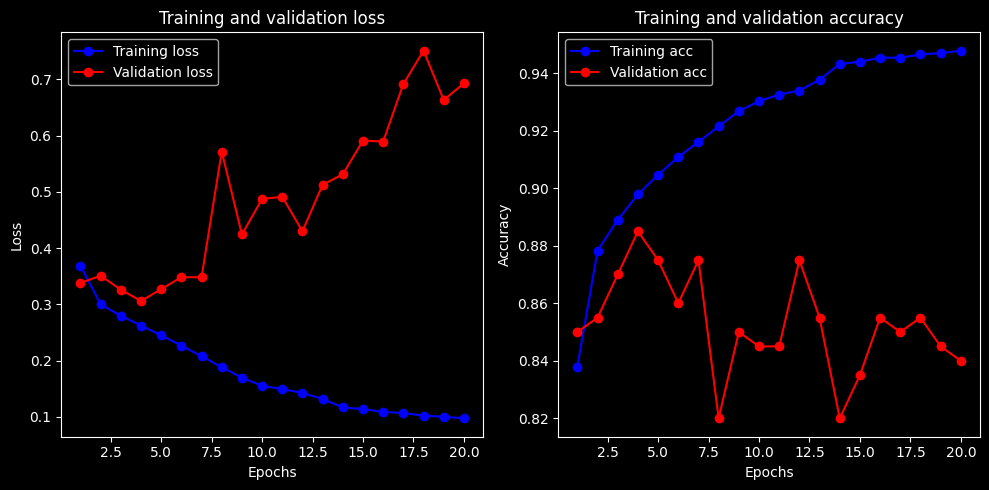

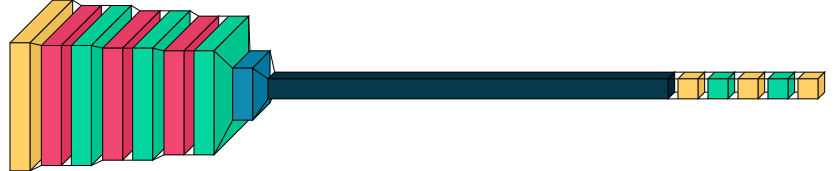

In [33]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Vamos a incluir aumentación de datos

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 sequential_3 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_70 (Conv2D)          (None, 30, 30, 8)         216       
                                                                 
 batch_normalization_64 (Bat  (None, 30, 30, 8)        32        
 chNormalization)                                                
                                                                 
 conv2d_71 (Conv2D)          (None, 28, 28, 16)        1152      
                                                                 
 batch_normalization_65 (Bat  (None, 28, 28, 16)       64        
 chNormalization)                                         

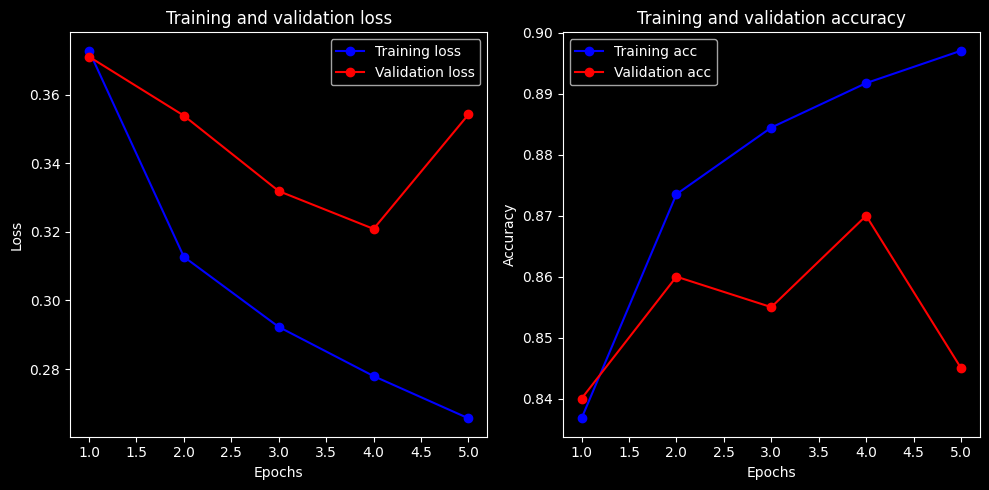

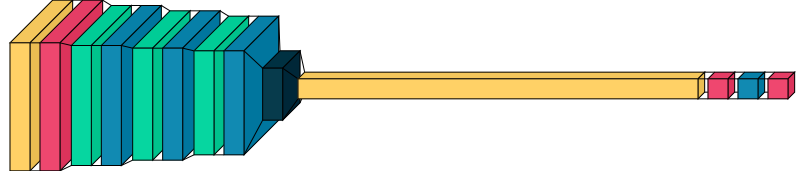

In [37]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

data_augmentation = tf.keras.Sequential(
 [
 layers.RandomRotation(0.01),
 ]
)

input = Input(shape=input_shape,name = 'Input_layer')
x = data_augmentation(input)
x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=5)

import visualkeras
visualkeras.layered_view(model)

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 sequential_5 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_76 (Conv2D)          (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_72 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_77 (Conv2D)          (None, 28, 28, 64)        18432     
                                                                 
 batch_normalization_73 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                         

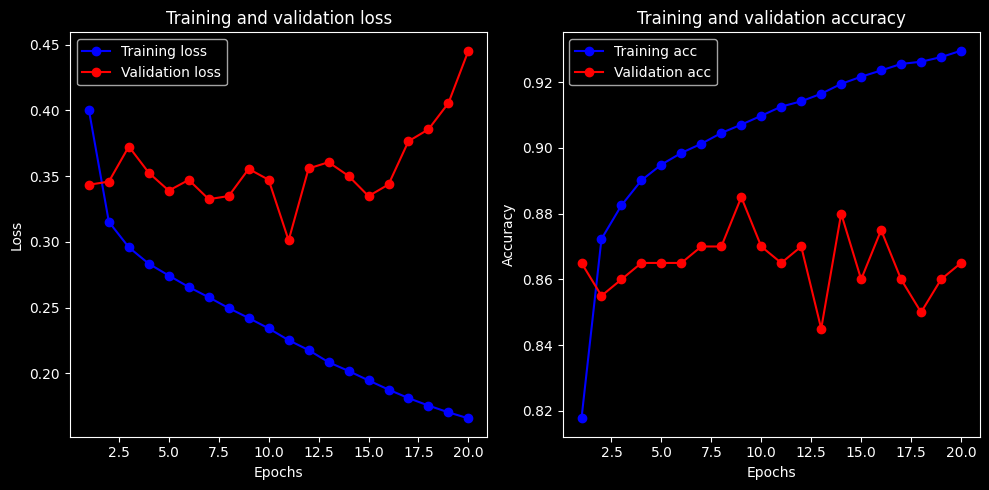

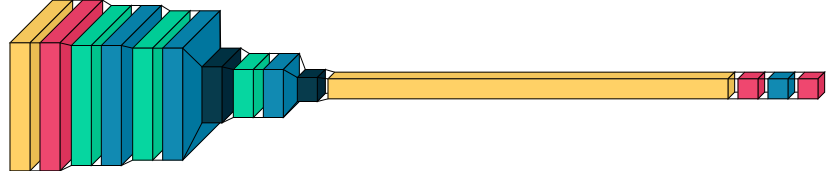

In [39]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

data_augmentation = tf.keras.Sequential(
 [
 layers.RandomRotation(0.01),
 ]
)

input = Input(shape=input_shape,name = 'Input_layer')
x = data_augmentation(input)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_79 (Conv2D)          (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_76 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_80 (Conv2D)          (None, 28, 28, 64)        18432     
                                                                 
 batch_normalization_77 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 average_pooling2d_31 (Avera  (None, 14, 14, 64)       0  

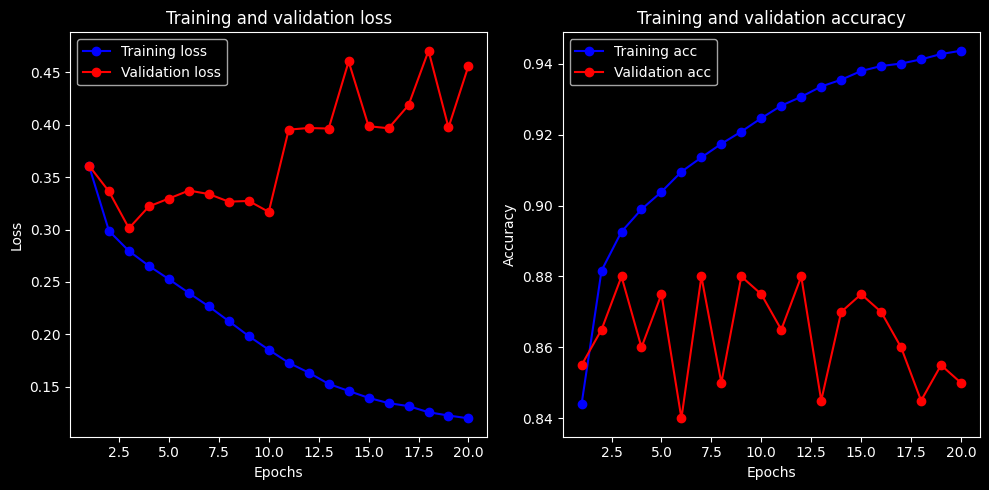

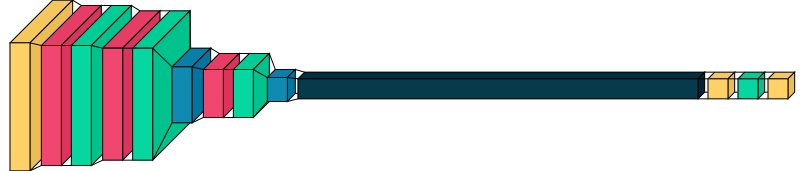

In [40]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

data_augmentation = tf.keras.Sequential(
 [
 layers.RandomRotation(0.01),
 ]
)

input = Input(shape=input_shape,name = 'Input_layer')
#x = data_augmentation(input)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Aumentamos a complexidade da rede

In [42]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)

data_augmentation = tf.keras.Sequential(
 [
 layers.RandomRotation(0.01),
 ]
)

input = Input(shape=input_shape,name = 'Input_layer')
#x = data_augmentation(input)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
x = Dense(16, activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=20)

import visualkeras
visualkeras.layered_view(model)

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_87 (Conv2D)          (None, 30, 30, 32)        864       
                                                                 
 batch_normalization_84 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_88 (Conv2D)          (None, 28, 28, 64)        18432     
                                                                 
 conv2d_89 (Conv2D)          (None, 26, 26, 64)        36864     
                                                                 
 batch_normalization_85 (Bat  (None, 26, 26, 64)       256       
 chNormalization)                                         

KeyboardInterrupt: 

## Segunda propuesta

VAMOS A USAR UNA RED MAS SECILLA DE CARA A ENCONTRAR UN MODELO QUE SEA INSUFICIENTE PARA AJUSTARSE E IR AUMENTANDO A PARITIR DE EL

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 30, 30, 8)         216       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 16)        1152      
                                                                 
 batch_normalization_28 (Bat  (None, 28, 28, 16)       64        
 chNormalization)                                                
                                                                 
 average_pooling2d_7 (Averag  (None, 14, 14, 16)       0         
 ePooling2D)                                                     
                                                                 
 Flatten_Layer (Flatten)     (None, 3136)              0  

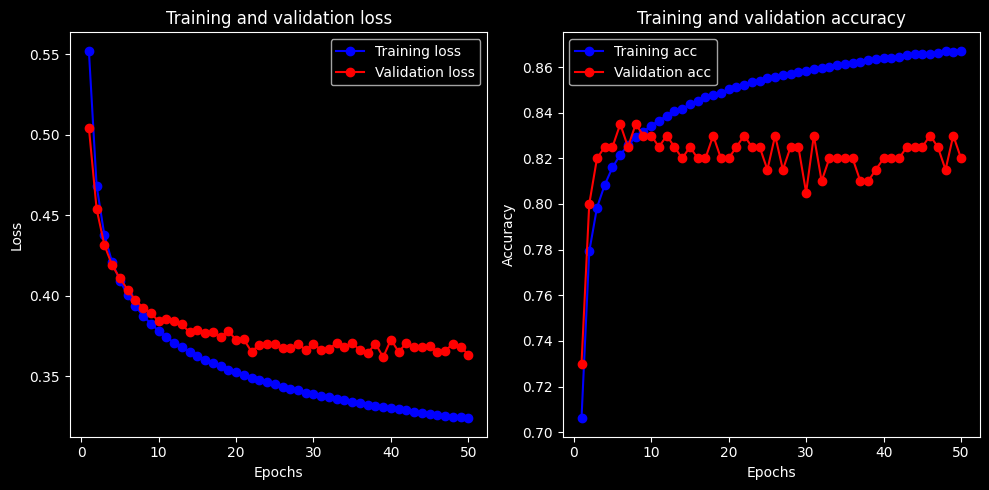

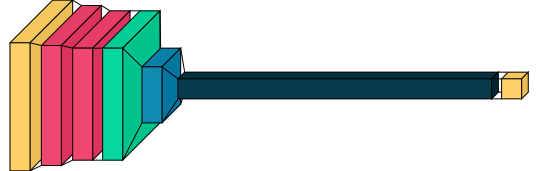

In [23]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=50)

import visualkeras
visualkeras.layered_view(model)

Reducimos el learning rate para evitar la oscilación

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 30, 30, 8)         216       
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 16)        1152      
                                                                 
 batch_normalization_31 (Bat  (None, 28, 28, 16)       64        
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 14, 14, 16)       0         
 gePooling2D)                                                    
                                                                 
 Flatten_Layer (Flatten)     (None, 3136)              0  

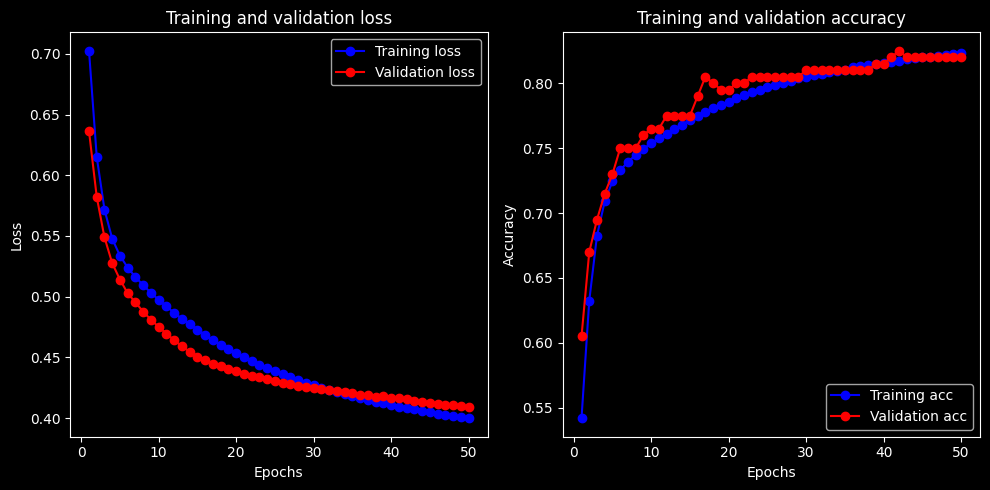

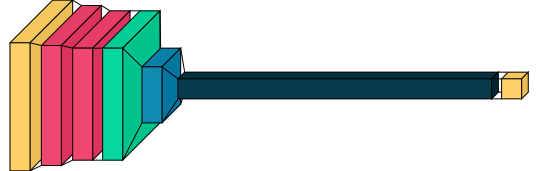

In [26]:
np.random.seed(423423)
tf.random.set_seed(1232413)

import visualkeras
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)


from tensorflow.keras import layers

center = True
scale = True

input_shape = (32, 32, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.000005)

input = Input(shape=input_shape,name = 'Input_layer')

x = Conv2D(8, kernel_size=(3, 3), activation='relu', use_bias=False)(input)
x = Conv2D(16, kernel_size=(3, 3), activation='relu', use_bias=False)(x)
x = layers.BatchNormalization(center=center,scale=scale)(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)

x = Flatten(name = 'Flatten_Layer')(x)
output = Dense(1, activation='sigmoid', name = 'Output_Layer')(x)

model = Model(inputs=input,outputs=output)

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

fitModel(model, ds_train_batch, ds_test_batch, num_epochs=50)

import visualkeras
visualkeras.layered_view(model)